In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
%matplotlib inline

In [2]:
# data ingestion

data= pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
# lets check the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# we can say that dataset do not have any null values and all variables are numerical

In [7]:
# lets check sttistical analysis of data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score'>

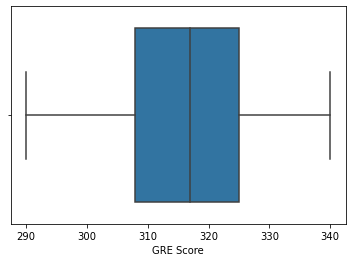

In [8]:
sns.boxplot(data["GRE Score"])

In [9]:
# after statistical analysis we can say that there is no huge outliers

In [10]:
# lets drop the serial number column bcoz it is not useful 

data1 = data.drop("Serial No.",axis=1)

In [11]:
data1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [25]:
# lets split the data into independent and dependent variable


x= data1.iloc[:,:-1]
y= data1.iloc[:,-1]


In [26]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [27]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [29]:
# splitting data into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=40)

In [30]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
27,298,98,2,1.5,2.5,7.50,1
336,319,110,3,3.0,2.5,8.79,0
227,312,110,2,3.5,3.0,8.53,0
281,317,110,3,4.0,4.5,9.11,1
286,336,118,5,4.5,4.0,9.19,1
...,...,...,...,...,...,...,...
440,305,104,2,2.5,1.5,7.79,0
165,322,110,5,4.5,4.0,8.97,0
7,308,101,2,3.0,4.0,7.90,0
219,312,104,3,3.5,3.5,8.42,0


In [31]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
167,313,102,3,2.0,3.0,8.27,0
169,311,99,2,2.5,3.0,7.98,0
461,301,102,3,2.5,2.0,8.13,1
253,335,115,4,4.5,4.5,9.68,1
42,313,107,2,2.5,2.0,8.50,1
...,...,...,...,...,...,...,...
331,311,105,2,3.0,2.0,8.12,1
479,325,110,4,4.5,4.0,8.96,1
415,327,106,4,4.0,4.5,8.75,1
404,311,101,3,2.0,2.5,7.64,1


In [32]:
y_train

27     0.44
336    0.72
227    0.64
281    0.80
286    0.92
       ... 
440    0.53
165    0.78
7      0.68
219    0.74
326    0.63
Name: Chance of Admit , Length: 335, dtype: float64

In [33]:
y_test

167    0.64
169    0.65
461    0.68
253    0.93
42     0.53
       ... 
331    0.73
479    0.79
415    0.76
404    0.62
222    0.76
Name: Chance of Admit , Length: 165, dtype: float64

In [34]:
# lets fetch all values on same scale by using standard scaler

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [35]:
x_train

array([[-1.62677928, -1.54512848, -1.00907812, ..., -1.05347203,
        -1.81278142,  0.87358909],
       [ 0.22656359,  0.45082798, -0.13104911, ..., -1.05347203,
         0.35015375, -1.14470294],
       [-0.39121736,  0.45082798, -1.00907812, ..., -0.52197635,
        -0.08578667, -1.14470294],
       ...,
       [-0.74423505, -1.04613937, -1.00907812, ...,  0.541015  ,
        -1.14210385, -1.14470294],
       [-0.39121736, -0.54715025, -0.13104911, ...,  0.00951933,
        -0.270223  , -1.14470294],
       [-1.53852485, -1.21246907, -0.13104911, ..., -1.5849677 ,
        -0.94090057, -1.14470294]])

In [36]:
x_test

array([[-0.30296294, -0.87980966, -0.13104911, ..., -0.52197635,
        -0.52172709, -1.14470294],
       [-0.47947179, -1.37879878, -1.00907812, ..., -0.52197635,
        -1.00796833, -1.14470294],
       [-1.36201601, -0.87980966, -0.13104911, ..., -1.5849677 ,
        -0.75646424,  0.87358909],
       ...,
       [ 0.93259897, -0.21449084,  0.74697991, ...,  1.07251068,
         0.283086  ,  0.87358909],
       [-0.47947179, -1.04613937, -0.13104911, ..., -1.05347203,
        -1.57804427,  0.87358909],
       [ 0.6678357 ,  0.94981709,  0.74697991, ...,  0.541015  ,
         0.35015375, -1.14470294]])

In [37]:
# model building

from sklearn.svm import SVR
model = SVR()

In [40]:
svr= model.fit(x_train,y_train)

In [41]:
svr

SVR()

In [46]:
# intercept
print(svr.intercept_)

[0.66417549]


In [42]:
# check model training accuracy
svr.score(x_train,y_train)

0.7799975744163882

In [43]:
# lets do the prediction

pred = svr.predict(x_test)


In [44]:
pred

array([0.58675309, 0.53125289, 0.61125837, 0.89497031, 0.73255903,
       0.56671965, 0.71354149, 0.60083421, 0.64733238, 0.57176297,
       0.72184915, 0.77118526, 0.4896905 , 0.62674459, 0.6765711 ,
       0.65082303, 0.6093488 , 0.52065679, 0.58900876, 0.75748018,
       0.66311993, 0.64715287, 0.69307141, 0.61564642, 0.89749692,
       0.7232839 , 0.6757295 , 0.868027  , 0.85367187, 0.60192713,
       0.63087616, 0.54695581, 0.67760034, 0.53828126, 0.67874063,
       0.87870331, 0.60816589, 0.75582726, 0.64786654, 0.84757818,
       0.88931603, 0.5968526 , 0.85352912, 0.83901995, 0.59571208,
       0.8912997 , 0.70816146, 0.81514521, 0.71662731, 0.63839991,
       0.59730463, 0.65400315, 0.86426675, 0.84714428, 0.85782429,
       0.79057142, 0.83355307, 0.82197199, 0.57522264, 0.69711877,
       0.75641315, 0.750692  , 0.68868224, 0.6840977 , 0.82073881,
       0.63593999, 0.76148939, 0.66334424, 0.59278643, 0.87413875,
       0.64616464, 0.61857089, 0.87255123, 0.66184351, 0.87621

In [48]:
# performance metrics

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.006506571908981421
0.06623864784744089
0.08066332443546707


In [51]:
# R square and adjusted r square

In [52]:
from sklearn.metrics import r2_score
score= r2_score(y_test,pred)

In [53]:
score

0.6901386367083605

In [55]:
## adjusted r-square

1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.676323161911918